# Evaluating Student's Performance and Analyzing Factors Influencing Academic Success in Underdeveloped Countries using Machine Learning

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.set_palette("deep")

In [2]:
dataset = pd.read_csv("./student_data.csv")
print(dataset.shape)
dataset.head()

(2392, 15)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Dataset Description

**Demographic Details**
```
Age: The age of the students ranges from 15 to 18 years.
Gender: Gender of the students, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
ParentalEducation: The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher
```

**Study Habits**
```
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
Absences: Number of absences during the school year, ranging from 0 to 30.
Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.
```

**Parental Involvement**
```
ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High
```

**Extracurricular Activities**
```
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
```

**Academic Performance**
```
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
```

**Target Variable: Grade Class**
```
GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)
```

## Exploratory Data Analysis

### Data Overview

In [3]:
display(dataset.info())
display(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


None

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


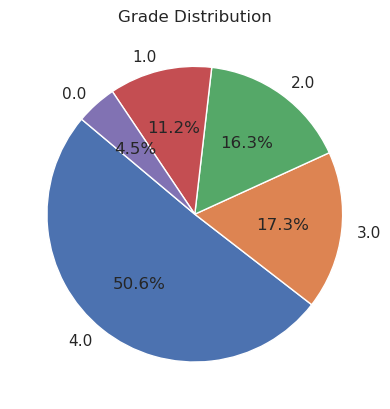

In [115]:
grade_counts = dataset["GradeClass"].value_counts()
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Grade Distribution')
plt.show()

### Demographic Analysis

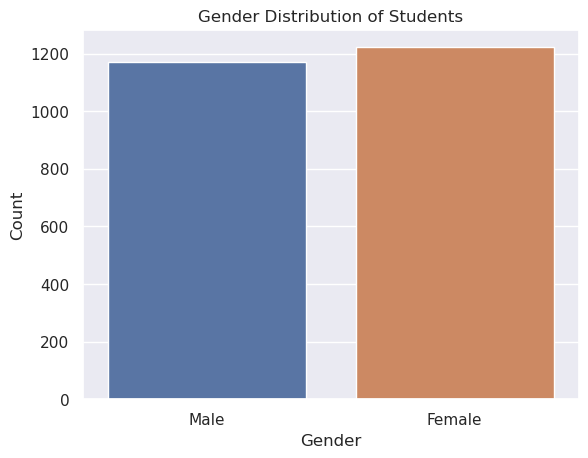

In [113]:
sns.countplot(x="Gender", data=dataset, hue="Gender", legend=False)
plt.title("Gender Distribution of Students")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.ylabel("Count")
plt.show()

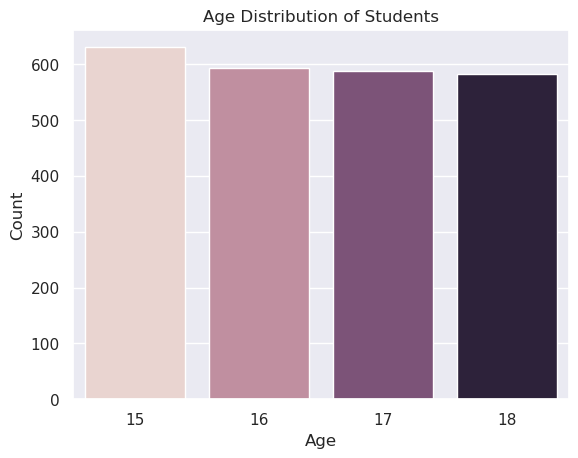

In [111]:
sns.countplot(x="Age", data=dataset, hue="Age", legend=False)
plt.title("Age Distribution of Students")
plt.ylabel("Count")
plt.show()

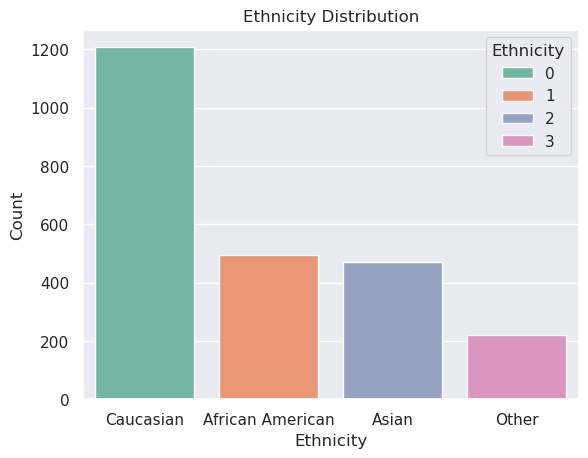

In [109]:
sns.countplot(x="Ethnicity", data=dataset, hue="Ethnicity",  palette="Set2")
plt.title("Ethnicity Distribution")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Caucasian", "African American", "Asian", "Other"])
plt.ylabel("Count")
plt.show()

### Parental Involvement Analysis

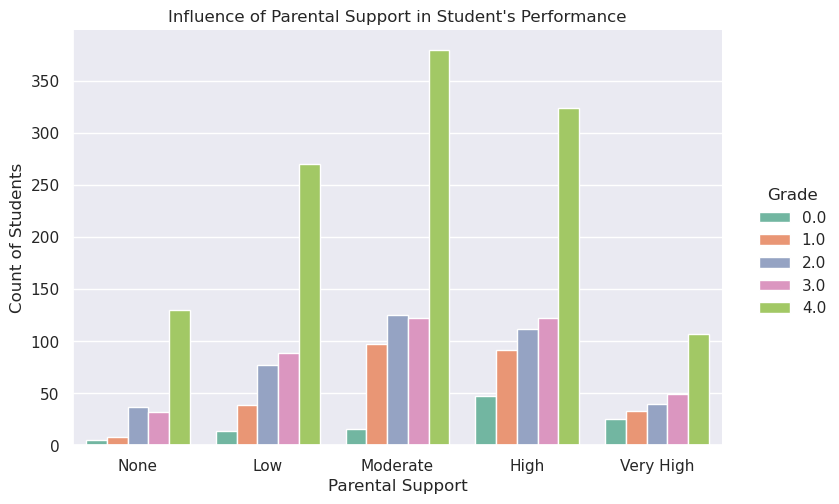

In [128]:
g = sns.catplot(x="ParentalSupport", hue="GradeClass", data=dataset, kind="count", height=5, aspect=1.5, palette="Set2")
g._legend.set_title("Grade")
plt.title("Influence of Parental Support in Student's Performance")
plt.xlabel('Parental Support')
plt.xticks(ticks=[0,1,2,3,4], labels=["None", "Low", "Moderate", "High", "Very High"])
plt.ylabel('Count of Students')
plt.show()

### Study Habits Analysis

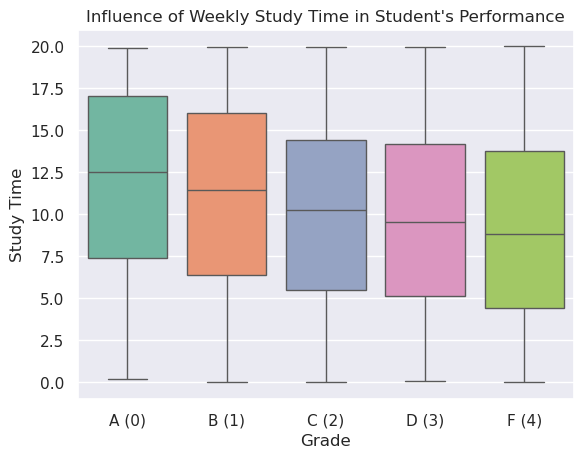

In [105]:
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=dataset, hue="GradeClass", palette="Set2", legend=False)
plt.title("Influence of Weekly Study Time in Student's Performance")
plt.xlabel('Grade')
plt.xticks(ticks=[0,1,2,3,4], labels=["A (0)", "B (1)", "C (2)", "D (3)", "F (4)"])
plt.ylabel('Study Time')
plt.show()

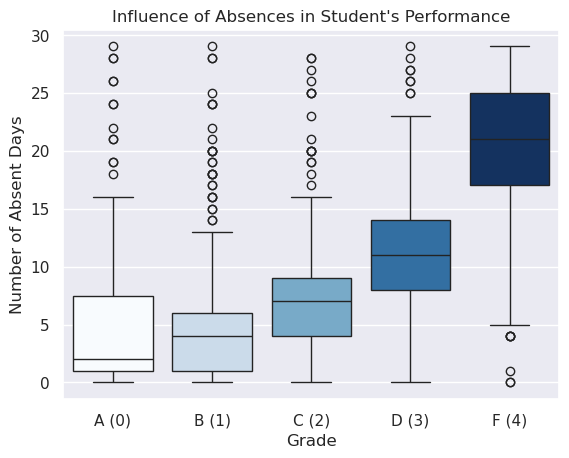

In [103]:
sns.boxplot(x='GradeClass', y='Absences', data=dataset, hue="GradeClass", palette="Blues", legend=False)
plt.title("Influence of Absences in Student's Performance")
plt.xlabel('Grade')
plt.xticks(ticks=[0,1,2,3,4], labels=["A (0)", "B (1)", "C (2)", "D (3)", "F (4)"])
plt.ylabel('Number of Absent Days')
plt.show()

### Extracurricular Activities Analysis

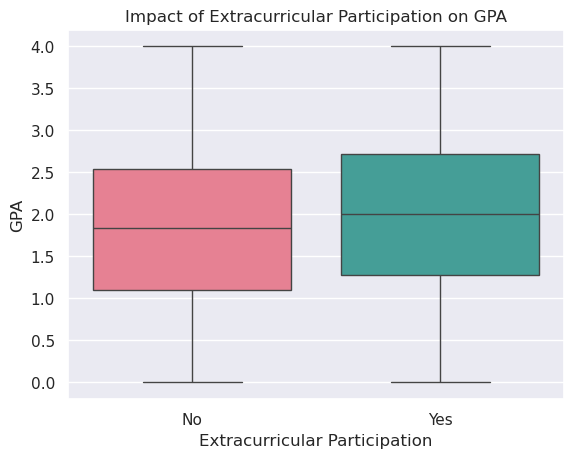

In [101]:
sns.boxplot(x="Extracurricular", y="GPA", data=dataset, hue="Extracurricular", palette="husl", legend=False)
plt.title("Impact of Extracurricular Participation on GPA")
plt.xlabel("Extracurricular Participation")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.ylabel("GPA")
plt.show()

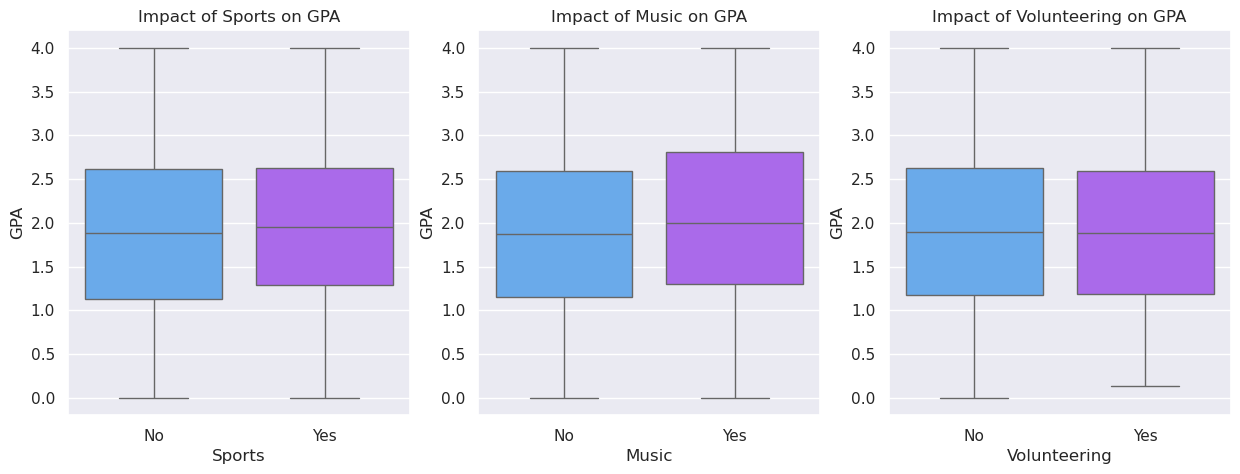

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x="Sports", y="GPA", data=dataset, hue="Sports", palette="cool", ax=axes[0], legend=False)
axes[0].set_title("Impact of Sports on GPA")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No", "Yes"])

sns.boxplot(x="Music", y="GPA", data=dataset, hue="Music", palette="cool", ax=axes[1], legend=False)
axes[1].set_title("Impact of Music on GPA")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["No", "Yes"])

sns.boxplot(x="Volunteering", y="GPA", data=dataset,hue="Volunteering", palette="cool", ax=axes[2], legend=False)
axes[2].set_title("Impact of Volunteering on GPA")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["No", "Yes"])

plt.show()

### Correlation analysis

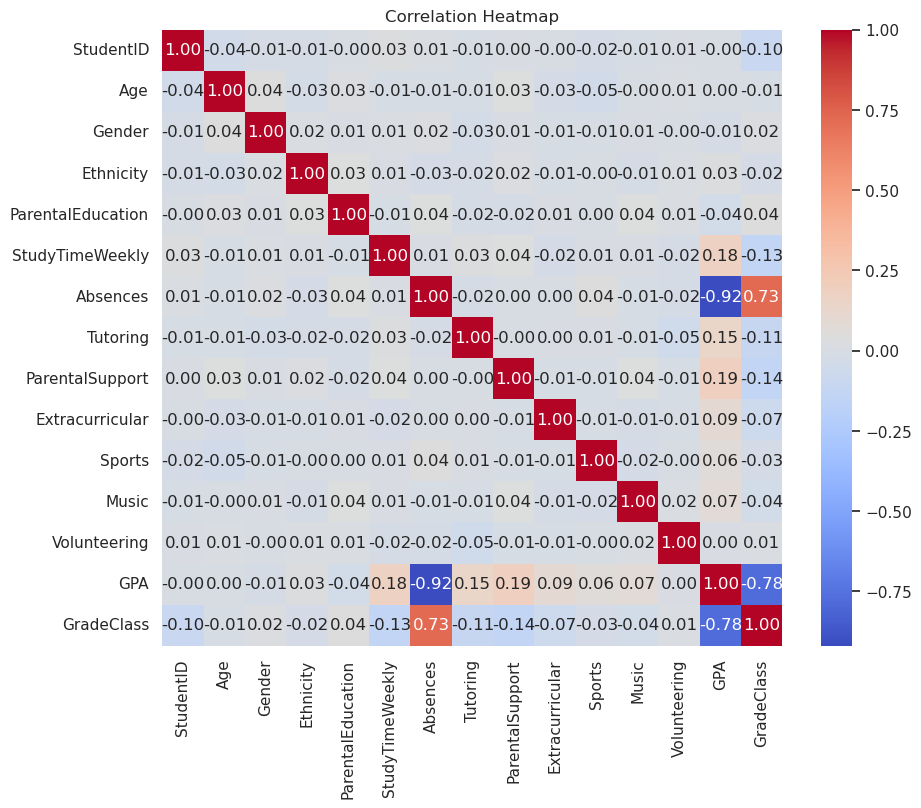

In [97]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In [14]:
X = dataset.drop(["GradeClass", "StudentID", "Age", "Gender", "Ethnicity", "Volunteering"], axis=1).values
y = dataset["GradeClass"].values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

## Model Building

In [16]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'Decision Tree': (DecisionTreeClassifier(class_weight='balanced'), {
        'decisiontreeclassifier__max_depth': [1,2,3,4,5,6,7,8,9,10]
    }),
    'RandomForest': (RandomForestClassifier(class_weight='balanced'), {
        'randomforestclassifier__n_estimators': [20,30,40,50,80],
    }),
    'Extra Trees': (ExtraTreesClassifier(class_weight='balanced'), {
        'extratreesclassifier__n_estimators': [20,30,40,50,80],
    }),
    'Gaussian NB': (GaussianNB(), {}),
    'SVM': (SVC(), {
        'svc__kernel': ['rbf', 'poly', 'sigmoid'],
    }),
    'KNN': (KNeighborsClassifier(), {
        'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15, 20, 40, 50],
    }),
    'LR': (LogisticRegression(solver='liblinear', penalty='l1', max_iter=5000, class_weight='balanced'), {})
}
cv_scores=[]
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores=[]

best_model = LogisticRegression()
max_score = 0

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='weighted',zero_division=0)
    f1 = f1_score(y_test,y_pred, average='weighted',zero_division=0)
    recall = recall_score(y_test,y_pred, average='weighted',zero_division=0)
    
    return accuracy,precision,f1,recall

for model_name, (model, params) in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    kf = KFold(n_splits=4, shuffle=True)
    
    grid_search = GridSearchCV(pipeline, params, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    model_score = grid_search.best_score_
    model_params = grid_search.best_params_
    best_fitted_model = grid_search.best_estimator_
    
    current_accuracy,current_precision,current_f1,current_recall = train_classifier(model, X_train,y_train,X_test,y_test)   
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)
    cv_scores.append(model_score)

    if current_accuracy >= max_score:
        max_score = current_accuracy
        best_model = best_fitted_model
    
    print(f"{model_name} CV score: {model_score:.2f}, accuracy: {current_accuracy:.2f}, with params: {model_params}")

Decision Tree CV score: 0.92, accuracy: 0.85, with params: {'decisiontreeclassifier__max_depth': 3}
RandomForest CV score: 0.92, accuracy: 0.94, with params: {'randomforestclassifier__n_estimators': 30}
Extra Trees CV score: 0.87, accuracy: 0.89, with params: {'extratreesclassifier__n_estimators': 80}
Gaussian NB CV score: 0.78, accuracy: 0.77, with params: {}
SVM CV score: 0.80, accuracy: 0.74, with params: {'svc__kernel': 'rbf'}
KNN CV score: 0.71, accuracy: 0.68, with params: {'kneighborsclassifier__n_neighbors': 10}


/usr/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


LR CV score: 0.71, accuracy: 0.73, with params: {}


In [17]:
performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,
                               'Precision':precision_scores,'F1':f1_scores, 'Recall': recall_scores, 
                               'CV Score':cv_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,F1,Recall,CV Score
1,RandomForest,0.939457,0.939680,0.938502,0.939457,0.924721
2,Extra Trees,0.889353,0.887592,0.887337,0.889353,0.868286
0,Decision Tree,0.849687,0.855290,0.851345,0.849687,0.916880
3,Gaussian NB,0.766180,0.753122,0.755468,0.766180,0.784631
4,SVM,0.741127,0.707378,0.723268,0.741127,0.804499
6,LR,0.728601,0.742757,0.722330,0.728601,0.707259
5,KNN,0.680585,0.677220,0.678256,0.680585,0.707261


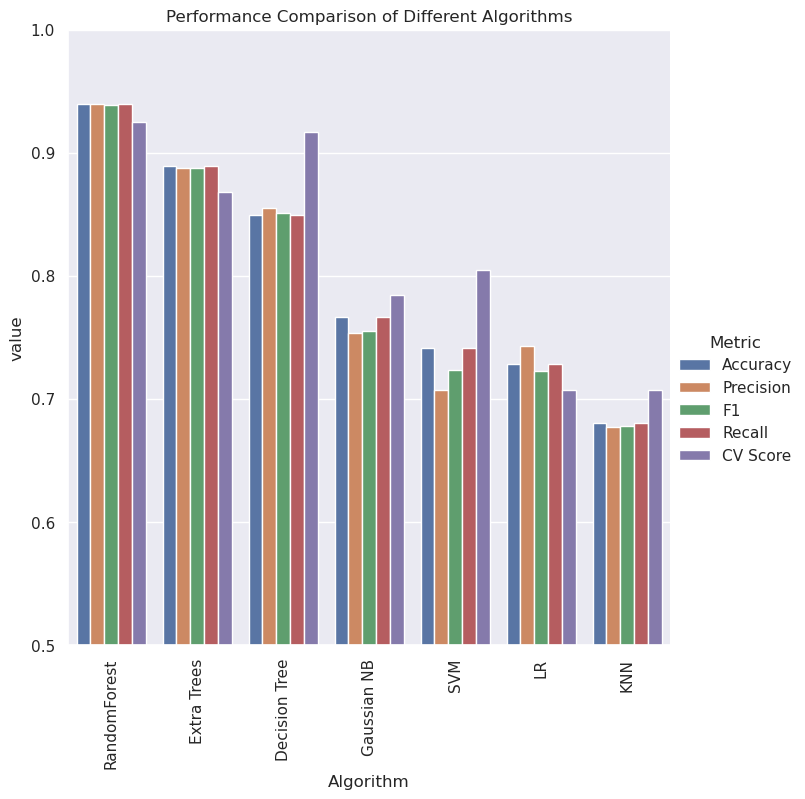

In [126]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

g = sns.catplot(x='Algorithm', y='value',
                hue='variable', data=performance_df1, 
                kind='bar', height=7, aspect=1)
g._legend.set_title("Metric")

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Performance Comparison of Different Algorithms")
plt.show()

## Model Evaluation

In [19]:
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=30))])

In [20]:
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True)
cv_score = cross_val_score(best_model, X_train, y_train, cv=kf)
print(f"Average 10-Fold Cross Validation Score: {cv_score.mean()}")

Average 10-Fold Cross Validation Score: 0.9200098167539268


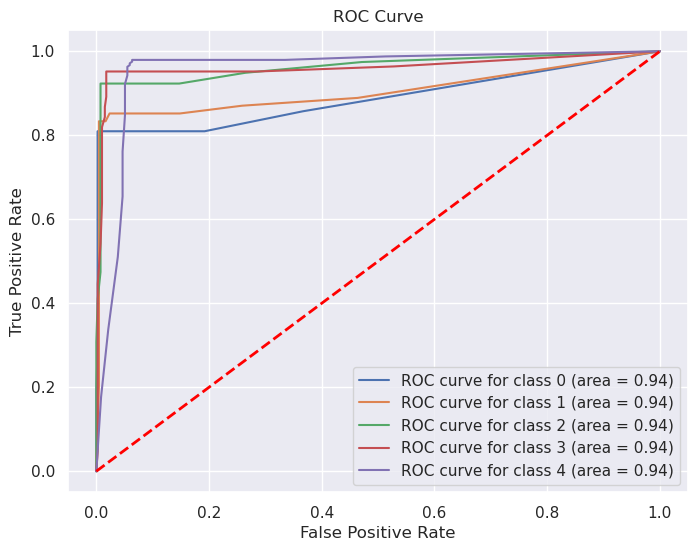

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = best_model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovo', average='weighted')

fpr = dict()
tpr = dict()
thresholds = dict()

for i in range(y_proba.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_proba[:, i])

plt.figure(figsize=(8, 6))
for i in range(y_proba.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9394572025052192
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.76      0.84        21
         1.0       0.94      0.83      0.88        54
         2.0       0.96      0.92      0.94        78
         3.0       0.92      0.95      0.93        83
         4.0       0.94      0.98      0.96       243

    accuracy                           0.94       479
   macro avg       0.94      0.89      0.91       479
weighted avg       0.94      0.94      0.94       479



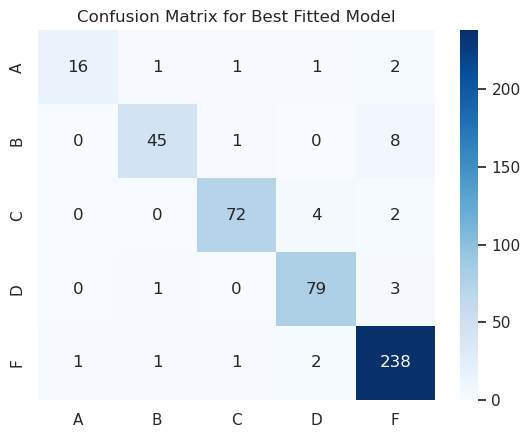

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['A', 'B', 'C', 'D', 'F'], 
                yticklabels=['A', 'B', 'C', 'D', 'F'])
plt.title("Confusion Matrix for Best Fitted Model")
plt.show()